# import

In [4]:
import pandas as pd
problem = pd.read_excel('./data/problemList.xlsx')


In [5]:
user = pd.read_csv('./clean_df.csv', index_col=0)

# 레벨에 따른 문제번호 분포 확인

In [3]:
problem_level = problem.groupby('level')[['problemId']].agg('count').rename(columns={'problemId':'problem'})
problem_level

,problem
level,
0,7545
1,141
2,241
3,666
4,840
5,763
6,734
7,839
8,941


In [4]:
# 레벨이 0인 문제는 뭘까?
problem[problem.level == 0]

# 뭔가 이상치인 것 같음
# key 와 bojTagId를 보고 필터링을 해보자

,problemId,title,acceptedUserCount,level,key,bojTagId
223,1223,마법의 돌,2,0,[],[]
237,1237,정ㅋ벅ㅋ,19419,0,[],[]
274,1274,커피숍1,31,0,[],[]
299,1299,전쟁 - 탈출편2,8,0,"['dijkstra', 'graphs', 'shortest_path']","[22, 7, 215]"
317,1317,그룹 단어,13,0,[],[]
...,...,...,...,...,...,...
29149,31024,Filesystem,0,0,[],[]
29150,31025,Placing Plates,0,0,[],[]
29151,31026,The ABC Conjecture,1,0,[],[]
29152,31039,Collection,1,0,[],[]


In [7]:
problem[problem.level == 0]['acceptedUserCount'].max()

19419

In [8]:
problem[problem.level == 0]['acceptedUserCount'].describe()
# 가장 높은 값을 가진 정ㅋ벅ㅋ 은 그냥 재미용도 풀이였음 해당 행을 드롭하고 다시 describe를 찍어보자

count     7545.000000
mean        15.548310
std        298.492032
min          0.000000
25%          0.000000
50%          0.000000
75%          2.000000
max      19419.000000
Name: acceptedUserCount, dtype: float64

In [12]:
problem.drop(index=problem[problem.title == '정ㅋ벅ㅋ'].index, inplace=True)

In [13]:
problem[problem.level == 0]['acceptedUserCount'].describe()
# 7708 이나 푼 문제를 확인해보자

count    7544.000000
mean       12.976273
std       197.963797
min         0.000000
25%         0.000000
50%         0.000000
75%         2.000000
max      7708.000000
Name: acceptedUserCount, dtype: float64

In [14]:
problem[problem.acceptedUserCount == 7708]
# 확인해보니 이것도 재미용도... 한개만 더 확인해보자

,problemId,title,acceptedUserCount,level,key,bojTagId
14368,15802,타노스,7708,0,['implementation'],[102]


In [15]:
problem.drop(index=problem[problem.title == '타노스'].index, inplace=True)
problem[problem.level == 0]['acceptedUserCount'].describe()


count    7543.000000
mean       11.956118
std       177.038606
min         0.000000
25%         0.000000
50%         0.000000
75%         2.000000
max      7243.000000
Name: acceptedUserCount, dtype: float64

In [16]:
problem[problem.acceptedUserCount == 7243]
# 이것도 이벤트다, 즉 레벨이 선정되지 않은 문제는 드롭해도 된다.

,problemId,title,acceptedUserCount,level,key,bojTagId
1559,2555,생일 출력하기,7243,0,[],[]


In [18]:
problem.drop(index=problem[problem.level == 0].index, inplace=True)
problem_level = problem.groupby('level')[['problemId']].agg('count').rename(columns={'problemId':'problem'})
problem_level

,problem
level,
1,141
2,241
3,666
4,840
5,763
6,734
7,839
8,940
9,919


<Axes: xlabel='level'>

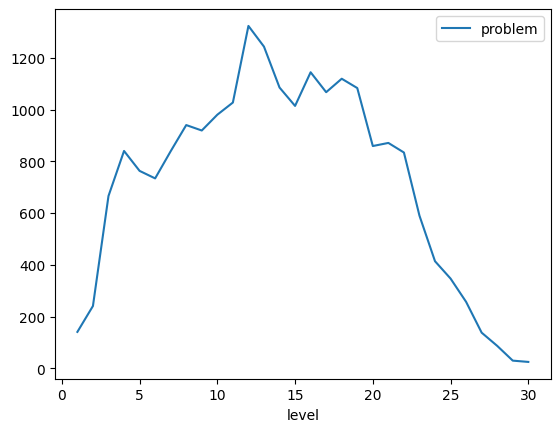

In [19]:
problem_level.plot()
# 분포를 확인해본 결과 일정하지 않기 때문에 레벨별로 문제를 추천할 때는 범위를 잘라서 추천받는 문제를 선정해야될 듯 싶다.
# 예를들어 레벨 24 부터 30까지는 같은 레벨로 해도 될듯?

# 티어에 따른 문제번호 분포 확인

In [8]:
import ast

In [9]:
# 데이터 처리를 위한 코드 (이미 제공됨)
user['solvedProblemList'] = user['solvedProblemList'].apply(ast.literal_eval)
user['triedNotsolvedList'] = user['triedNotsolvedList'].apply(ast.literal_eval)

In [10]:
user

,id,tier,rank,rightCnt,wrongCnt,time out,memory exceed,print exceed,runTime error,compile error,solvedProblemList,triedNotsolvedList
0,jh5154,15,10033,546,252,76,2,7,42,33,"[1000, 1001, 1003, 1008, 1012, 1018, 1021, 102...","[1722, 1725, 1916, 11279, 12902, 13199, 13398]"
1,baefr,15,10034,515,235,100,34,5,53,26,"[1000, 1001, 1002, 1008, 1010, 1011, 1012, 101...","[1062, 2343, 2615, 2931, 2954, 3025, 6588, 698..."
2,nacean,15,10035,423,339,107,20,6,36,40,"[1000, 1001, 1003, 1008, 1009, 1010, 1012, 101...","[1038, 1039, 1937, 1981, 2407, 2533, 6087, 993..."
3,klxex,15,10036,451,271,88,35,4,83,45,"[1003, 1005, 1010, 1012, 1018, 1021, 1038, 104...","[1253, 1509, 1774, 2133, 2473, 7662, 14002]"
4,qortndud97,15,10037,570,250,57,32,14,35,38,"[1000, 1001, 1005, 1008, 1009, 1010, 1012, 103...","[1153, 1701, 1777, 1799, 1865, 2076, 2243, 260..."
...,...,...,...,...,...,...,...,...,...,...,...,...
84017,kjsmel,5,100269,58,1,116,0,22,7,3,"[1000, 1001, 1008, 1065, 1110, 1152, 1157, 119...",[1011]
84018,limy0213,5,100269,58,1,0,0,0,9,16,"[1000, 1001, 1008, 1026, 1094, 1100, 1476, 192...",[10172]
84019,palzmnbvcx,5,100269,58,4,116,60,0,6,2,"[1000, 1001, 1008, 1110, 1330, 1427, 1436, 154...","[1181, 1929, 10814, 10989]"
84020,planet4869,6,100269,58,4,116,0,0,9,1,"[1000, 1001, 1010, 1094, 1149, 1152, 1157, 120...","[1008, 1475, 1929, 2805]"


In [11]:
# 각 행의 문제 리스트의 길이를 계산
user['problem_count'] = user['solvedProblemList'].apply(len)

# 티어별로 문제 개수 합계를 계산
tier_problem_counts = user.groupby('tier')['problem_count'].sum()


# 티어 별 필터링 후 레벨 분포 확인

In [14]:
unique_problems_per_tier = user.groupby('tier')['solvedProblemList'].agg(lambda x: set().union(*x))


In [27]:

unique_level_counts_per_tier = {}

for tier, problems_set in unique_problems_per_tier.items():
    problems_set_int = set(map(int, problems_set))
    # Filter the problem DataFrame for the current set of problem IDs
    filtered_df = problem[problem['problemId'].isin(problems_set_int)]

    level_counts = filtered_df['level'].value_counts().to_dict()

    # Store this information in the dictionary
    unique_level_counts_per_tier[tier] = level_counts


In [28]:
unique_level_counts_per_tier

{1: {4: 64,
  3: 64,
  1: 57,
  5: 32,
  8: 24,
  7: 22,
  6: 21,
  9: 21,
  2: 21,
  10: 15,
  11: 8,
  12: 5,
  13: 3,
  15: 2,
  0: 2},
 2: {3: 123,
  4: 105,
  1: 73,
  12: 67,
  7: 52,
  5: 51,
  8: 50,
  11: 49,
  10: 47,
  9: 44,
  6: 41,
  2: 41,
  13: 29,
  14: 24,
  16: 17,
  15: 15,
  0: 5,
  18: 4,
  17: 2},
 3: {3: 133,
  4: 94,
  1: 74,
  5: 59,
  7: 54,
  6: 52,
  2: 50,
  8: 46,
  10: 44,
  9: 38,
  12: 37,
  11: 35,
  13: 18,
  14: 16,
  15: 7,
  0: 7,
  16: 5,
  18: 1},
 4: {4: 147,
  3: 137,
  1: 98,
  8: 78,
  5: 76,
  12: 68,
  7: 67,
  11: 65,
  6: 65,
  9: 62,
  10: 60,
  2: 55,
  13: 37,
  14: 28,
  16: 28,
  15: 19,
  18: 7,
  0: 7,
  17: 6,
  19: 4,
  20: 3},
 5: {4: 222,
  3: 214,
  11: 151,
  12: 138,
  1: 128,
  5: 126,
  8: 123,
  9: 120,
  7: 116,
  13: 115,
  2: 107,
  6: 106,
  10: 106,
  14: 93,
  15: 58,
  16: 55,
  17: 35,
  18: 26,
  19: 26,
  0: 13,
  22: 3,
  21: 3,
  20: 3},
 6: {4: 370,
  12: 345,
  3: 335,
  11: 310,
  13: 278,
  5: 261,
  8: 2

In [29]:
unique_level_counts_per_tier[15]

{4: 837,
 12: 748,
 13: 689,
 11: 670,
 3: 662,
 5: 597,
 6: 555,
 10: 553,
 7: 550,
 9: 549,
 8: 545,
 14: 544,
 16: 520,
 15: 502,
 17: 392,
 18: 375,
 19: 307,
 0: 248,
 2: 241,
 20: 232,
 21: 192,
 22: 156,
 1: 141,
 23: 83,
 24: 45,
 25: 33,
 26: 27,
 28: 22,
 27: 11,
 29: 9,
 30: 3}

In [ ]:
# 그냥 겁나 다양하게 푸는군...